In [1]:
import pickle
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
path = '../CPMjs/scripts/2000_0.7log.txt'
f = open(path, 'r')
x = f.readlines()
f.close()

In [3]:
path = '../CPMjs/scripts/2000_0.7log.txt'
cols = ['time','id','cellkind','x','y','z']
#df = pd.read_table(path,index_col = False,names = cols)
#df = pd.read_table(path,sep = '\t',)
data = pd.read_csv(path, sep="\t", header=None,names = cols)

In [4]:
data.head()

,time,id,cellkind,x,y,z
0,0,112,1,5.333333,22.555556,31.222222
1,0,252,1,49.166667,25.333333,31.833333
2,0,366,1,3.000000,22.000000,21.000000
3,0,392,1,4.000000,20.000000,32.000000
4,0,407,1,5.888889,15.000000,22.888889


In [5]:
track = np.loadtxt('/home/lau/Desktop/Thesis Stuff/CELLLAMBDA_2000MAX1500_140.txt')

In [11]:
import plotly.express as px
data = pd.DataFrame(track,columns = ['x','y','z'])
fig = px.line_3d(data,x = 'x',y = 'y',z = 'z')
fig.show()

<IPython.core.display.Javascript object>


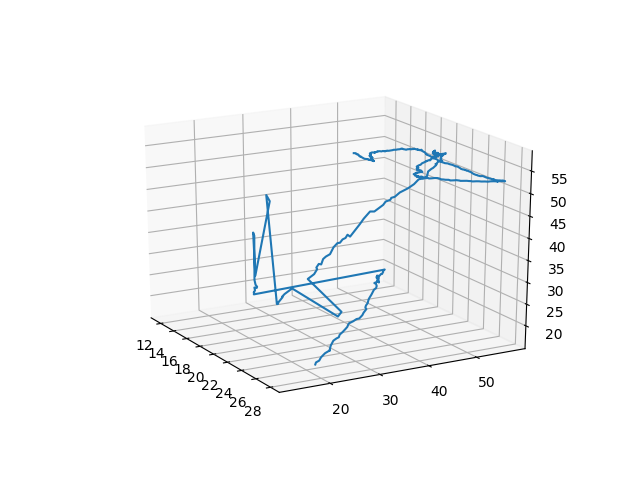

In [6]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(track[:,0],track[:,1],track[:,2])
plt.show()

In [11]:
for x in track:
    print(x)

[11.667 51.683 48.093]
[11.78456914 51.78557114 48.15330661]
[11.88388388 51.8018018  48.10910911]
[11.88511489 51.85614386 48.14285714]
[11.944 51.864 48.089]
[12.10578842 51.76347305 48.05389222]
[12.15115115 51.85085085 48.11411411]
[12.316 51.757 48.074]
[12.44  51.635 48.042]
[12.453 51.648 47.961]
[12.64  51.581 47.949]
[12.66266266 51.62562563 48.01701702]
[12.808 51.618 47.96 ]
[12.88911089 51.58241758 47.94005994]
[13.20440882 51.63226453 47.82865731]
[13.42914172 51.75548902 47.91616766]
[13.66666667 51.68368368 47.98998999]
[13.709 51.651 48.007]
[13.69269269 51.68468468 48.03903904]
[13.903 51.688 48.042]
[14.01001001 51.76176176 48.08808809]
[14.07107107 51.7027027  48.12412412]
[13.98398398 51.65065065 48.12612613]
[14.057 51.675 48.136]
[14.054 51.709 48.132]
[14.17134269 51.87374749 48.12925852]
[14.237 51.798 48.188]
[14.28557114 51.67735471 48.11523046]
[14.37775551 51.61222445 48.15430862]
[14.31795386 51.58274824 48.18054162]
[14.41095609 51.56899167 48.18299722]
[1

In [26]:
# cpmjs cell track : 
data = pd.read_csv('/home/lau/Desktop/Thesis Stuff/cpmjsDensity/ACT_1log.txt',sep = '\t',header = None)
onecell = data[data[1] == 1]
track = onecell[[3,4,5]].to_numpy()
print(track)

[[23.85714286 21.99350649 26.62987013]
 [24.78571429 22.82467532 27.31818182]
 [24.69934641 22.53594771 26.37908497]
 ...
 [34.44805195 16.14935065  5.78571429]
 [34.62337662 16.1038961   5.87012987]
 [34.14935065 16.14285714  5.46103896]]


<IPython.core.display.Javascript object>


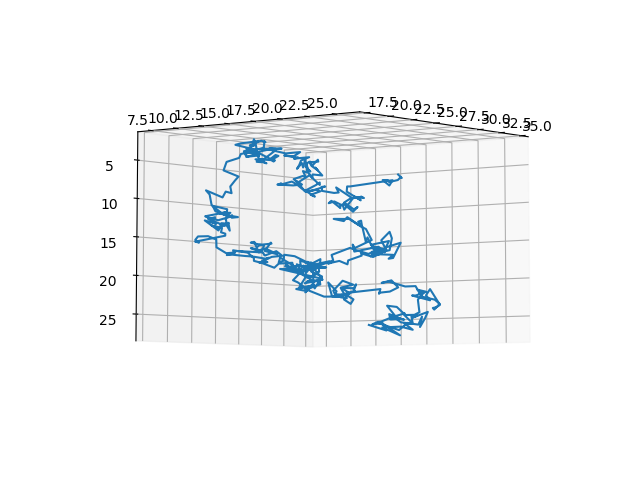

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(track[:,0],track[:,1],track[:,2])
plt.show()

In [17]:
def handle_boundaries2(cell_track,pr = False):
    # look for boundary crossings in any
    # of the coordinates
    cell_track2 = cell_track.copy()
    for i in range(len(cell_track) - 1):
        dif = np.subtract(cell_track[i],cell_track[i+1])
        for j,coordinate in enumerate(dif):
            if coordinate > 32:
                # went over boundary from 256 -> 0
                if pr:
                    print('Jumped from :',cell_track[i],'to :',cell_track[i+1])
                    print('Adding ',256, ' to rest of cell track') #cell_track[i,j]
                    print('changed axis : ',j)
                    print('Old coordinat : ',cell_track[i])

                cell_track2[:i + 1,j] -= 64

                if pr:
                    print('New coordinate : ',cell_track[i])
                    print(i,j)
                
            elif coordinate < -32:
                # form 0 -> 256
                if pr:
                    print('Jumped from :',cell_track[i],'to :',cell_track[i+1])
                    print('Adding ', 256, ' to previous of cell track') 
                    print('Old coordinat : ',cell_track[i])

                cell_track2[:i + 1,j] += 64

                if pr:
                    print('New coordinate : ',cell_track[i])
                    print(i,j)
    return cell_track2



In [18]:
track = np.loadtxt('/home/lau/GIT/FRC_Thesis/CPM_code/testdat/testtrack_frc.txt')
track = handle_boundaries2(track)

<IPython.core.display.Javascript object>


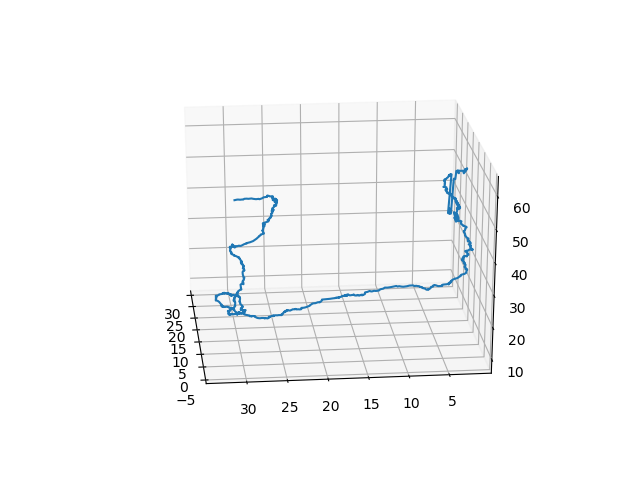

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(track[:,0],track[:,1],track[:,2])
plt.show()

In [20]:
for x in track:
    print(x)

[-0.47333738  2.70290794 64.6999939 ]
[-0.36370829  2.84233133 64.4617038 ]
[-0.5221691   2.97335307 64.41320061]
[-0.51102184  2.71227235 64.65383363]
[-0.80319168  2.78822439 64.68185407]
[-0.72843369  2.99404142 64.44685578]
[-1.00048627  2.85680094 64.52330749]
[-1.48432847  3.21261771 63.97448681]
[-1.10165248  3.25783599 64.48779937]
[-1.12109446  3.61862118 64.49328104]
[-0.86731486  3.9035892  64.49106974]
[-1.56064599  3.81647165 64.07251941]
[-1.55124031  3.81748256 64.11600318]
[-0.78219814  4.02481816 64.26000378]
[-1.42415151  4.21386276 62.25284834]
[-1.42691325  4.39672165 62.42268286]
[-1.4404474   4.64398455 51.98422544]
[-1.33082021  4.81136648 51.82618019]
[-1.70988387  4.90537612 53.2927037 ]
[-1.84134739  4.90972197 53.95867687]
[-1.69943976  4.91553028 52.56184306]
[-1.73639082  5.03456026 52.35804032]
[-1.80964374  4.74170328 64.01656051]
[-1.8616482   4.94832634 63.97026761]
[-1.7744126   4.85052078 63.87078787]
[-1.81936174  5.01759182 63.7482713 ]
[-1.93248314

[25.308 29.44   7.77 ]
[25.41058941 29.50949051  7.78421578]
[25.496 29.474  7.962]
[25.615 29.322  8.136]
[25.58541459 29.33666334  8.19380619]
[25.56456456 29.28428428  8.1981982 ]
[25.71728272 29.20879121  8.21678322]
[25.79420579 29.09190809  8.10989011]
[25.95418327 29.10856574  8.10358566]
[26.12075848 29.11776447  8.19061876]
[26.15184815 29.11388611  8.36363636]
[26.248 29.115  8.617]
[26.16183816 29.1048951   8.56343656]
[26.105 28.987  8.724]
[26.36363636 29.01398601  8.91908092]
[26.48048048 28.94294294  9.05805806]
[26.31836327 28.91916168  9.17265469]
[26.37262737 28.87112887  9.2967033 ]
[26.49600798 28.68562874  9.5738523 ]
[26.43856144 28.52047952  9.6993007 ]
[26.46713147 28.47011952  9.77191235]
[26.61338661 28.50649351 10.07992008]
[26.51248751 28.54445554 10.16483516]
[26.48255234 28.52442672 10.37487537]
[26.63110668 28.53439681 10.69790628]
[26.732 28.554 11.187]
[27.04195804 28.31768232 11.32767233]
[27.09580838 28.13772455 11.03193613]
[27.11311311 28.25725726 1